In [119]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel


In [120]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them
X = data.values[:,2:-1].astype('float64')
#X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
svm = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=250)
logreg = LogisticRegression()

In [130]:
select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print('Scikit-learn Feature Selection:')
print('X_train shape is: {}'.format(X_train.shape))
print('X_train feature selected shape is: {}'.format(X_train_selected.shape))
mask = select.get_support()
print(mask)
idxs_selected = select.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
print(idxs_selected)

print("Scitkit-learn Features selected:")
print('texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se')
print('fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst')
print("\n")

print('Accuracy with all features:')
svm.fit(X_train, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test, Y_test)*100),  '%')

rfc.fit(X_train, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test, Y_test)*100),  '%')

nb.fit(X_train, Y_train)
print('The scikit-learn score of NB: {:.2f}'.format(nb.score(X_test, Y_test)*100),  '%')

knn.fit(X_train, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test, Y_test)*100),  '%')

mlp.fit(X_train, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test, Y_test)*100),  '%')

logreg.fit(X_train, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test, Y_test)*100),  '%')


print('\n')
print('Accuracy with feature selection:')

select2 =SelectFromModel(svm, threshold=0.5)
select2.fit(X_train, Y_train)
X_train_selected2 = select.transform(X_train)
X_test_selected2 = select.transform(X_test)
svm.fit(X_train_selected2, Y_train)
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')

select3 =SelectFromModel(rfc, threshold=0.9)
select3.fit(X_train, Y_train)
X_train_selected3 = select.transform(X_train)
X_test_selected3 = select.transform(X_test)
rfc.fit(X_train_selected3, Y_train)
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected3, Y_test)*100),  '%')

select4 =SelectFromModel(nb, threshold=0.9)
select4.fit(X_train, Y_train)
X_train_selected4 = select.transform(X_train)
X_test_selected4 = select.transform(X_test)
nb.fit(X_train_selected4, Y_train)
print('The scikit-learn accuracy of GNB: {:.2f}'.format(nb.score(X_test_selected4, Y_test)*100),  '%')

select5 =SelectFromModel(knn, threshold=0.9)
select5.fit(X_train, Y_train)
X_train_selected5 = select.transform(X_train)
X_test_selected5 = select.transform(X_test)
knn.fit(X_train_selected5, Y_train)
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test_selected5, Y_test)*100),  '%')

select6 =SelectFromModel(mlp, threshold=0.9)
select6.fit(X_train, Y_train)
X_train_selected6 = select.transform(X_train)
X_test_selected6 = select.transform(X_test)
mlp.fit(X_train_selected6, Y_train)
print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected6, Y_test)*100),  '%')

select = SelectFromModel(logreg, threshold=0.9)
select.fit(X_train, Y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
logreg.fit(X_train_selected, Y_train)
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')


Scikit-learn Feature Selection:
X_train shape is: (426, 29)
X_train feature selected shape is: (426, 13)
[False False False  True False False  True  True False  True  True False
  True False False False False False False False  True  True  True  True
 False  True  True  True False]
[ 3  6  7  9 10 12 20 21 22 23 25 26 27]
Scitkit-learn Features selected:
texture_mean, smoothness_mean, compactness_mean, symmetry_mean, radius_se, symmetry_se
fractal_dimension_se, radius_worst, texture_worst, area_worst, smoothness_worst, compactness_worst


Accuracy with all features:
The scikit-learn accuracy of SVM: 95.10 %
The scikit-learn accuracy of RFC: 95.80 %
The scikit-learn score of NB: 91.61 %
The scikit-learn accuracy of KNN: 96.50 %
The scikit-learn accuracy of MLP: 97.90 %
The scikit-learn accuracy of LR: 95.10 %


Accuracy with feature selection:
The scikit-learn accuracy of SVM: 95.80 %
The scikit-learn accuracy of RFC: 97.20 %
The scikit-learn accuracy of GNB: 92.31 %
The scikit-learn ac

In [131]:
print('Confusion Matrices all with feature selection except MLP:')
print('The scikit-learn accuracy of LR: {:.2f}'.format(logreg.score(X_test_selected, Y_test)*100),  '%')
print("LR Confusion Matrix")
predictions = logreg.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
print('The scikit-learn accuracy of SVM: {:.2f}'.format(svm.score(X_test_selected2, Y_test)*100),  '%')
print("SVM Confusion Matrix")
predictions2 = svm.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions2))
print('The scikit-learn accuracy of RFC: {:.2f}'.format(rfc.score(X_test_selected3, Y_test)*100),  '%')
print("RFC Confusion Matrix")
predictions3 = rfc.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions3))
print('The scikit-learn accuracy of GNB: {:.2f}'.format(nb.score(X_test_selected4, Y_test)*100),  '%')
print("GNB Confusion Matrix")
predictions4 = nb.predict(X_test_selected4)
print(confusion_matrix(Y_test, predictions4))
print('The scikit-learn accuracy of KNN: {:.2f}'.format(knn.score(X_test_selected5, Y_test)*100),  '%')
print("KNN Confusion Matrix")
predictions5 = knn.predict(X_test_selected5)
print(confusion_matrix(Y_test, predictions5))

print('The scikit-learn accuracy of MLP: {:.2f}'.format(mlp.score(X_test_selected6, Y_test)*100),  '%')
#all features
mlp = MLPClassifier(max_iter=250)      
mlp.fit(X_train, Y_train)
print('MLP Confusion Matrix')
predictions6 = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions6))

from sklearn.metrics import classification_report
print("\n")
print("LR Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions, target_names=target_names))

print("SVM Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions2, target_names=target_names))

print("RFC Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions3, target_names=target_names))

print("GNB Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions4, target_names=target_names))

print("KNN Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions5, target_names=target_names))

print("MLP Report:")
target_names = ['Benign', 'Malignant']
print(classification_report(Y_test, predictions6, target_names=target_names))

Confusion Matrices all with feature selection except MLP:
The scikit-learn accuracy of LR: 96.50 %
LR Confusion Matrix
[[90  0]
 [ 5 48]]
The scikit-learn accuracy of SVM: 95.80 %
SVM Confusion Matrix
[[90  0]
 [ 6 47]]
The scikit-learn accuracy of RFC: 97.20 %
RFC Confusion Matrix
[[90  0]
 [ 4 49]]
The scikit-learn accuracy of GNB: 92.31 %
GNB Confusion Matrix
[[84  6]
 [ 5 48]]
The scikit-learn accuracy of KNN: 96.50 %
KNN Confusion Matrix
[[87  3]
 [ 2 51]]
The scikit-learn accuracy of MLP: 93.01 %
MLP Confusion Matrix
[[88  2]
 [ 1 52]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.95      1.00      0.97        90
  Malignant       1.00      0.91      0.95        53

avg / total       0.97      0.97      0.96       143

SVM Report:
             precision    recall  f1-score   support

     Benign       0.94      1.00      0.97        90
  Malignant       1.00      0.89      0.94        53

avg / total       0.96      0.96      0.96       14

LR Confusion Matrix
[[90  0]
 [ 5 48]]
Accuracy is:  0.965034965035


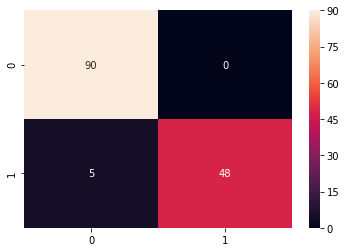

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print("LR Confusion Matrix")
predictions = logreg.predict(X_test_selected)
print(confusion_matrix(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")

ac = accuracy_score(Y_test,logreg.predict(X_test_selected))
print('Accuracy is: ',ac)



SVM Confusion Matrix
[[90  0]
 [ 6 47]]
Accuracy is:  0.958041958042


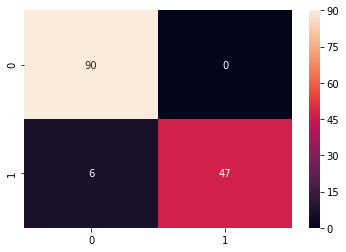

In [143]:

print("SVM Confusion Matrix")
predictions2 = svm.predict(X_test_selected2)
print(confusion_matrix(Y_test, predictions2))
cm = confusion_matrix(Y_test, predictions2)
sns.heatmap(cm,annot=True,fmt="d")

ac = accuracy_score(Y_test,svm.predict(X_test_selected2))
print('Accuracy is: ',ac)




RFC Confusion Matrix
[[90  0]
 [ 4 49]]
Accuracy is:  0.972027972028


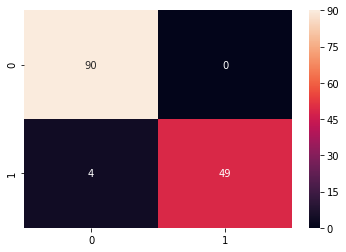

In [142]:
print("RFC Confusion Matrix")
predictions3 = rfc.predict(X_test_selected3)
print(confusion_matrix(Y_test, predictions3))

cm = confusion_matrix(Y_test, predictions3)
sns.heatmap(cm,annot=True,fmt="d")

ac = accuracy_score(Y_test,rfc.predict(X_test_selected3))
print('Accuracy is: ',ac)

GNB Confusion Matrix
Accuracy is:  0.923076923077


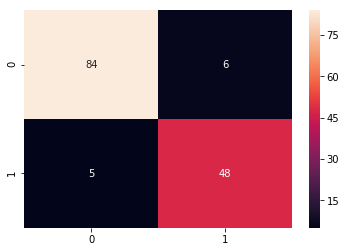

In [135]:

print("GNB Confusion Matrix")
predictions = nb.predict(X_test_selected4)
cm = confusion_matrix(Y_test, predictions4)
sns.heatmap(cm,annot=True,fmt="d")

ac = accuracy_score(Y_test,nb.predict(X_test_selected4))
print('Accuracy is: ',ac)


KNN Confusion Matrix
[[87  3]
 [ 2 51]]
Accuracy is:  0.965034965035


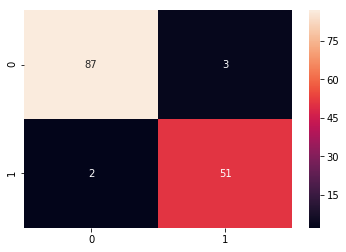

In [144]:
print("KNN Confusion Matrix")
predictions5 = knn.predict(X_test_selected5)
print(confusion_matrix(Y_test, predictions5))

cm = confusion_matrix(Y_test, predictions5)
sns.heatmap(cm,annot=True,fmt="d")

ac = accuracy_score(Y_test,knn.predict(X_test_selected5))
print('Accuracy is: ',ac)

Accuracy is:  0.979020979021


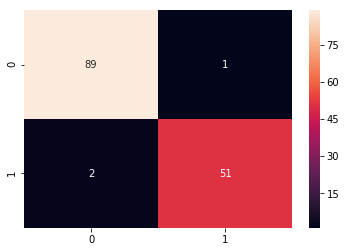

In [150]:
mlp = MLPClassifier(max_iter=250)      

#all features
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm,annot=True,fmt="d")


print('Accuracy is: ', mlp.score(X_test, Y_test))

